Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.
https://www.kaggle.com/c/quora-question-pairs This is the Dataset You can use this dataset for this question.

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("train.csv")

### Preprocessing the data 

In [6]:
train.replace(np.nan, " ", inplace= True)

In [7]:
def case_convert():
    train.question1 = [i.lower() for i in train.question1]
    train.question2 = [i.lower() for i in train.question2]


def remove_specials():
    train.question1 = [re.sub(r"[^a-zA-Z]", " ", text) for text in train.question1]
    train.question2 = [re.sub(r"[^a-zA-Z]", " ", text) for text in train.question2]
    

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in train.question1:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    train.question1 = texts
    texts.clear()
    for item in train.question2:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    train.question2 = texts
    texts.clear()
    

def remove_accents():
    train.question1 = [unidecode.unidecode(text) for text in train.question1]
    train.question2 = [unidecode.unidecode(text) for text in train.question2]
    
def normalize_spaces():
    train.question1 = [re.sub(r"\s+", " ", text) for text in train.question1]
    train.question2 = [re.sub(r"\s+", " ", text) for text in train.question2]
    

In [8]:
case_convert()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()

In [9]:
#word len
train['q1_len']=train['question1'].str.len()
train['q2_len']=train['question2'].str.len()

#word count
train['q1_word']=train['question1'].apply(lambda x: len(x.split(" ")))
train['q2_word']=train['question2'].apply(lambda x: len(x.split(" ")))


#common words

train['s1']=train['question1'].apply(lambda x: x.split(" "))
train['s2']=train['question1'].apply(lambda x: x.split(" "))
train['common_words']= [len(set(a) & set(b)) for a, b in zip(train.s1, train.s2)]
train.drop(['s1','s2'],axis=1,inplace=True)


#common words share

train['word_share_q1']=round(train['common_words']/train['q1_word'],2)
train['word_share_q2']=round(train['common_words']/train['q2_word'],2)

### Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_9376\1780286650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicate'] == 0]['q1_word'], label='is_duplicate = 0')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9376\1780286650.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr

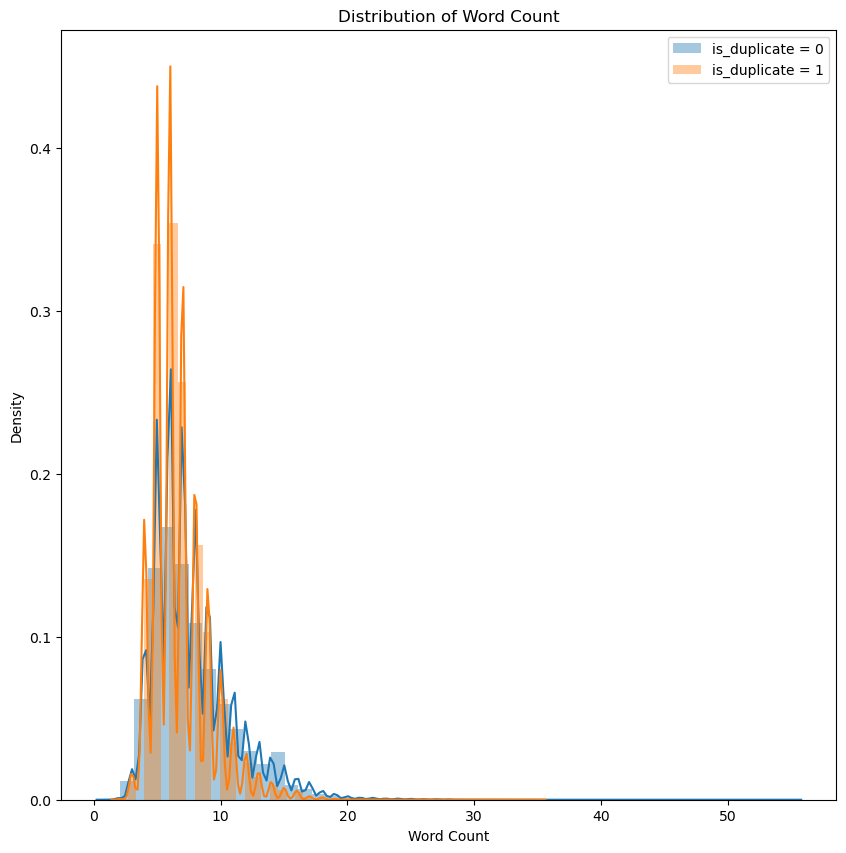

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(train[train['is_duplicate'] == 0]['q1_word'], label='is_duplicate = 0')
sns.distplot(train[train['is_duplicate'] == 1]['q2_word'], label='is_duplicate = 1')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Distribution of Word Count')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9376\288022977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicate'] == 0]['word_share_q1'], hist=False, label='Non-duplicate')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9376\288022977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

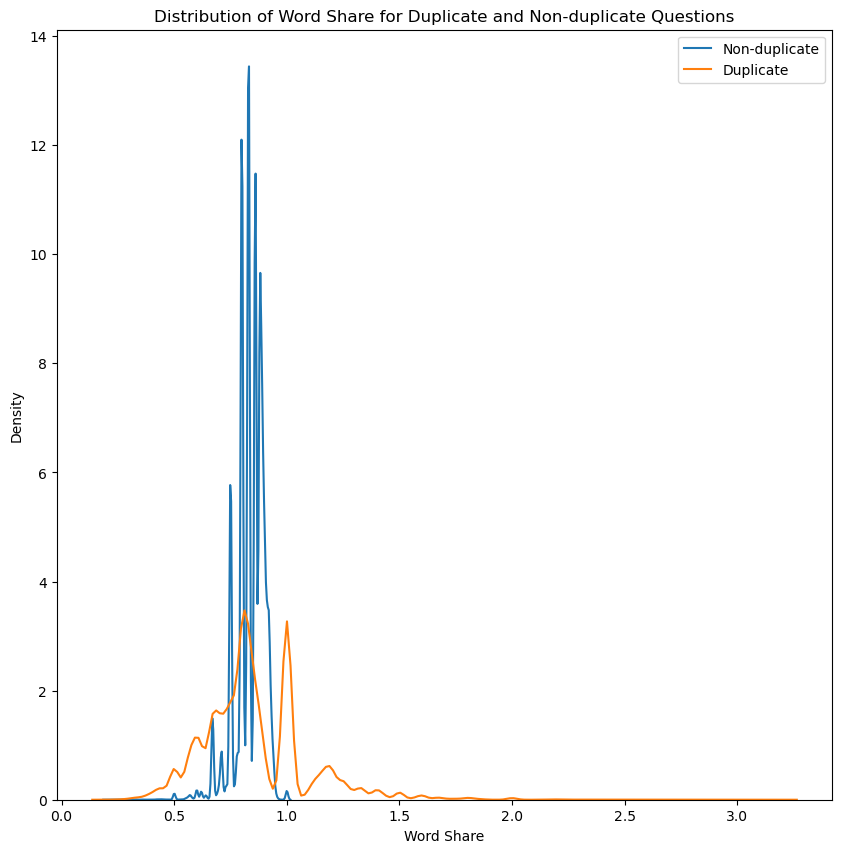

In [15]:
plt.figure(figsize=(10, 10))
sns.distplot(train[train['is_duplicate'] == 0]['word_share_q1'], hist=False, label='Non-duplicate')
sns.distplot(train[train['is_duplicate'] == 1]['word_share_q2'], hist=False, label='Duplicate')
plt.legend()
plt.xlabel('Word Share')
plt.ylabel('Density')
plt.title('Distribution of Word Share for Duplicate and Non-duplicate Questions')
plt.show()


Minimum length: 0
Maximum length: 334
Average length: 38


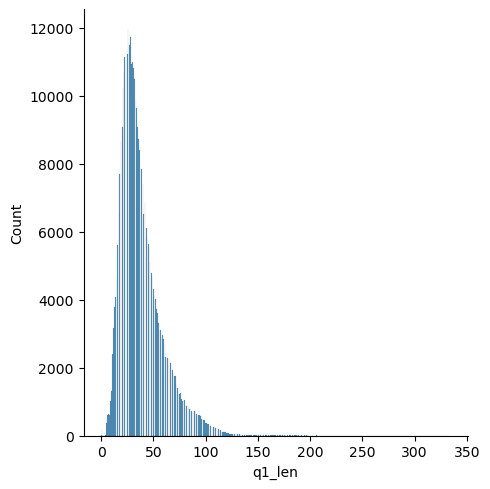

In [16]:
# Plot the distribution
sns.displot(train['q1_len'])

# Calculate statistics
minimum_length = train['q1_len'].min()
maximum_length = train['q1_len'].max()
average_length = train['q1_len'].mean()

# Print the statistics
print('Minimum length:', minimum_length)
print('Maximum length:', maximum_length)
print('Average length:', int(average_length))


In [6]:
train = train.sample(100000, replace=True)

In [7]:
x = train.drop(['is_duplicate'], axis=1)
y = train['is_duplicate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Mapping the words in the questions using TF-IDF

In [8]:
vector = TfidfVectorizer(max_features=5000)
train_df = vector.fit_transform(x_train['question1'] + ' ' + x_train['question2']).toarray()
test_df = vector.fit_transform(x_test['question1']+ ' ' + x_test['question2'] ).toarray()
x_train = x_train.drop(['question1', 'question2'], axis=1)
x_test = x_test.drop(['question1', 'question2'], axis=1)
x_train = np.concatenate([x_train.to_numpy(), train_df], axis=1)
x_test = np.concatenate([x_test.to_numpy(), test_df], axis=1)

### Model training and evaluation

In [10]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     26863
           1       0.38      0.75      0.50      6137

    accuracy                           0.73     33000
   macro avg       0.65      0.73      0.66     33000
weighted avg       0.82      0.73      0.75     33000



In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.726